<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/yfinance/List4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [284]:
!pip install -q yfinance
!pip install -q hurst

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from scipy.stats import entropy, kurtosis
import hurst
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize, Normalizer

Generowanie danych


In [286]:
# N = 500
# scalar = 10
# t = pd.date_range('2015-07-01', periods=N, freq=BDay())
# x = np.log(np.cumsum(np.random.randn(N) + 1)) + scalar
# x = np.sin(np.random.normal(loc=1, scale=0.03, size=N))

# x = pd.Series(x, index=t)

# plt.figure(figsize=(10,3))
# plt.plot(t,x, label='orginal')
# plt.legend()
# plt.show()

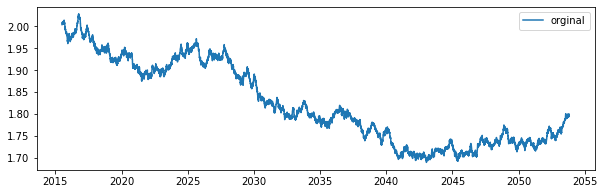

0.5528003681518755


In [287]:
N = 9999
scalar = 10
# x = pd.Series(x, index=t)

# x = hurst.random_walk(N, proba=0.5)
t = pd.date_range('2015-07-01', periods=N, freq=BDay())

random_changes = 1. + np.random.randn(N) / 1000.
raw_x = np.cumprod(random_changes)*2  # create a random walk from random changes
x = pd.Series(raw_x, index=t)

pp = hurst.compute_Hc(x, kind='price', simplified=True)

plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

print(pp[0])

# Zad 1
Wersja biblioteczna

In [288]:
x.describe()

count    9999.000000
mean        1.822836
std         0.092273
min         1.689651
25%         1.737705
50%         1.798653
75%         1.913944
max         2.027323
dtype: float64

In [289]:
print(kurtosis(x))

-1.3210342584214778


# Zad 2

In [290]:
# E = x.apply(lambda x : entropy(N, base=2)).reset_index()

E = entropy(x, base=2)
print(E)

13.285728767601983


In [291]:
# def hurst(input_ts, lags_to_test=[2, 100]):
#   tau = []
#   lagvec = []

#   # print(None is input_ts)
#   for lag in range(lags_to_test[0], lags_to_test[1]):
#     # pp = np.subtract(input_ts[lag:], input_ts[:-lag])
#     pp = input_ts[lag:] - input_ts[:-lag]
#     # print(pp)
#     # print(input_ts[:-lag])
#     # print(None is pp)
#     lagvec.append(lag)
#     tau.append(np.std(pp))

#   # print(lagvec)
#   # print(tau)

#   m = np.polyfit(lagvec, tau, 1)
#   return m[0]

# print(hurst(series))

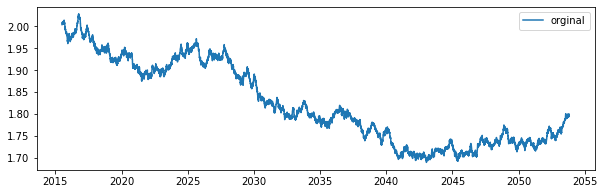

In [292]:
plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

In [293]:
print(hurst.compute_Hc(x)[0])

0.5430017197300038


In [294]:
# def vectorized_stride_v1(array, clearing_time_index, max_time, sub_window_size,
#                          stride_size):
#     start = clearing_time_index + 1 - sub_window_size + 1
    
#     sub_windows = (
#         start + 
#         np.expand_dims(np.arange(sub_window_size), 0) +
#         np.expand_dims(np.arange(max_time + 1), 0).T
#     )
    
#     # Fancy indexing to select every V rows.
#     return array[sub_windows[::stride_size]]


# def vectorized_stride_v2(array, clearing_time_index, max_time, sub_window_size,
#                          stride_size):
#     start = clearing_time_index + 1 - sub_window_size + 1
    
#     sub_windows = (
#         start + 
#         np.expand_dims(np.arange(sub_window_size), 0) +
#         # Create a rightmost vector as [0, V, 2V, ...].
#         np.expand_dims(np.arange(max_time + 1, step=stride_size), 0).T
#     )
    
#     return array[sub_windows]

In [295]:
# vectorized_stride_v2(x, )

In [296]:
# def rolling_window(seq, window_size):
#     it = iter(seq)
#     win = [it.next() for cnt in range(window_size)] # First window
#     yield win
#     for e in it: # Subsequent windows
#         win[:-1] = win[1:]
#         win[-1] = e
#         yield win

# Zad 3


Dla zadania 1


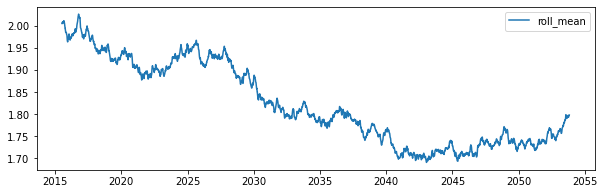

In [297]:
roll_mean = x.rolling(7).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

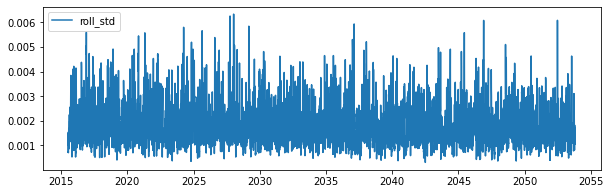

In [298]:
roll_std = x.rolling(7).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

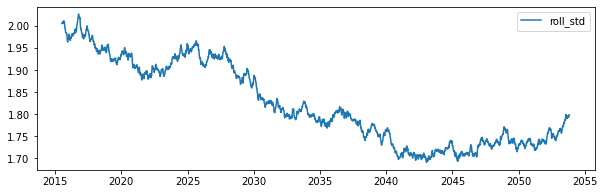

In [299]:
roll_median = x.rolling(7).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

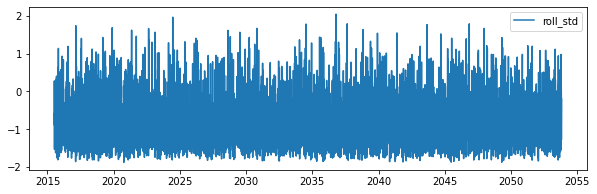

In [300]:
roll_kurtosis = x.rolling(7).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

Do zadania 2

In [301]:
def entopy_base_2(data):
    return entropy(data, base=2)

In [302]:
def first_hurst(data):
    return hurst.compute_Hc(data)[0]

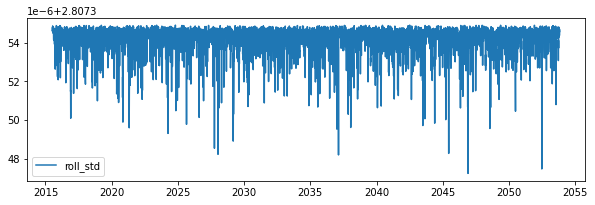

In [303]:
roll_entropy = x.rolling(7).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

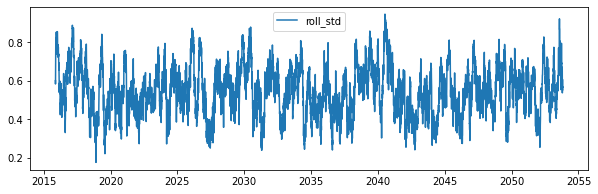

In [304]:
roll_hurst = x.rolling(100).apply(first_hurst)

plt.figure(figsize=(10,3))
plt.plot(t, roll_hurst, label='roll_std')
plt.legend()
plt.show()

# Zad 4

Normalized


In [305]:
raw_x = raw_x.reshape(-1, 1)
normalized = normalize(raw_x, norm='l2')

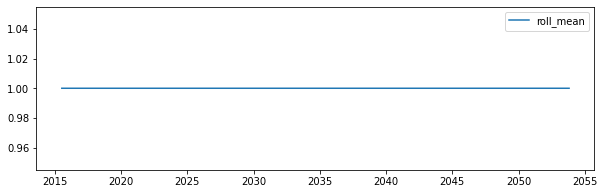

In [306]:
# roll_entropy = x.rolling(7).apply(entopy_base_2)

# plt.figure(figsize=(10,3))
# plt.plot(t, roll_entropy, label='roll_std')
# plt.legend()
# plt.show()
normalized = pd.DataFrame(normalized)

roll_mean = normalized.rolling(7).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

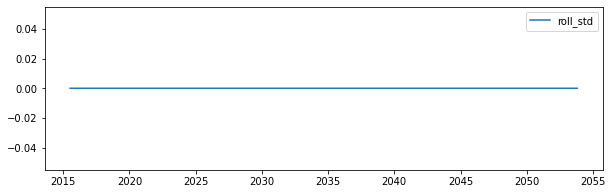

In [307]:
roll_std = normalized.rolling(7).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

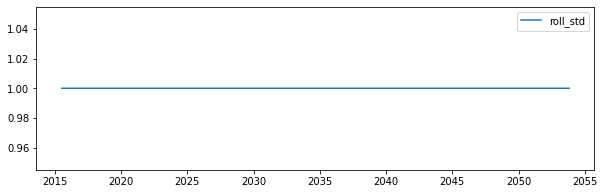

In [308]:
roll_median = normalized.rolling(7).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/core/window/rolling.py:1342: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return window_func(values, begin, end, min_periods)


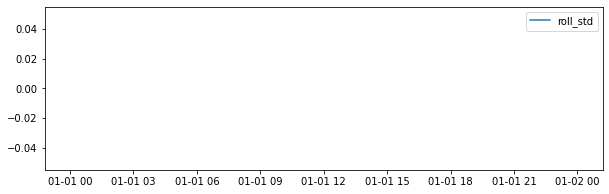

In [309]:
roll_kurtosis = normalized.rolling(7).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

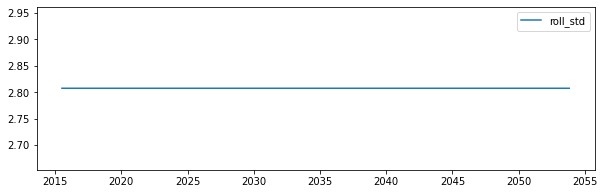

In [310]:
roll_entropy = normalized.rolling(7).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

Scaled


In [311]:
scaler = StandardScaler()
# scaled = scaler.fit(x)
raw_x = raw_x.reshape(-1, 1)
stand = scaler.fit_transform(raw_x)

# plt.figure(figsize=(10,3))
# plt.plot(t, stand, label='roll_std')
# # plt.plot(t, raw_x, label='roll_std')
# plt.legend()
# plt.show()

stand = pd.DataFrame(stand)

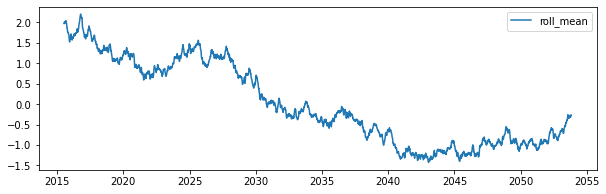

In [312]:
roll_mean = stand.rolling(7).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

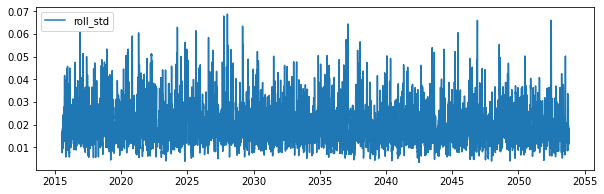

In [313]:
roll_std = stand.rolling(7).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

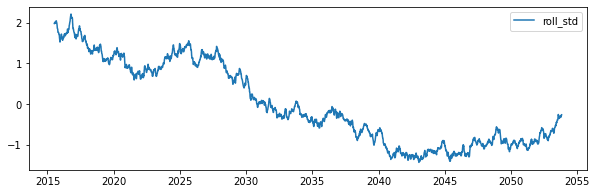

In [314]:
roll_median = stand.rolling(7).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

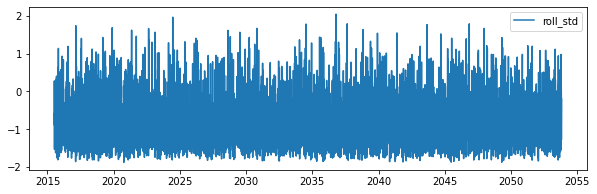

In [315]:
roll_kurtosis = stand.rolling(7).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

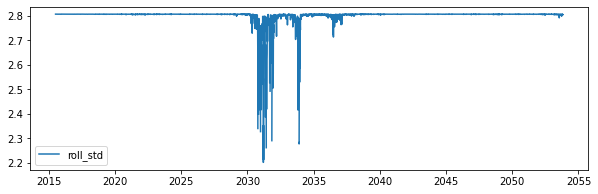

In [316]:
roll_entropy = stand.rolling(7).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()